In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from itertools import chain

In [2]:
def CDr(grad_input, weight_regulariser=1e-5, dropout_regulariser=1e-3, eps=1e1,
        tmp=0.1, comparison=None):
  # Concrete Dropout interpolation
  init_min, init_max = 0.1, 0.1
  init_min = np.log(init_min) - np.log(1.0 - init_min)
  init_max = np.log(init_max) - np.log(1.0 - init_max)

  p_logit = (torch.empty(1).uniform_(init_min, init_max))
  p = torch.sigmoid(p_logit)

  u_noise = torch.rand_like(grad_input)

  drop_prob = (torch.log(p + eps) -
                torch.log(1 - p + eps) +
                torch.log(u_noise + eps) -
                torch.log(1 - u_noise + eps))

  drop_prob = torch.sigmoid(drop_prob / tmp)

  random_tensor = 1 - drop_prob
  retain_prob = 1 - p
  new_grads = torch.mul(grad_input, random_tensor) / retain_prob

  x1 = np.linspace(0, len(grad_input.numpy().flatten()),
                   num=len(grad_input.numpy().flatten()))
  x2 = np.linspace(0, len(new_grads.numpy().flatten()),
                   num=len(new_grads.numpy().flatten()))

  plt.step(x1, grad_input.numpy().flatten(), c='k', alpha=0.4)
  plt.plot(x2, new_grads.numpy().flatten(), c='r', alpha=0.7)
  if comparison != None:
    plt.plot(x2, comparison.numpy().flatten(), '--', c='g', alpha=0.5)
  plt.show()

  return new_grads

In [ ]:
comp = torch.tensor([[-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0000],
        [ 0.0500, -0.0500, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000,  0.0500, -0.0500, -0.0000, -0.0000, -0.0000, -0.0500, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000,  0.0500, -0.0500, -0.0000, -0.0500, -0.0000, -0.0500,
         -0.0000, -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000,  0.0500, -0.0500, -0.0000, -0.0000, -0.0000,
         -0.0500, -0.0000, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000,  0.0500, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0500, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0500, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0500, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0500, -0.0000,
         -0.0000, -0.0000, -0.0500, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,  0.0500,
         -0.0000, -0.0000, -0.0500, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
          0.0500, -0.0000, -0.0500, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000,  0.0500, -0.0000, -0.0000],
        [-0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000,
         -0.0000, -0.0000, -0.0000, -0.0000]])

grad_input = torch.tensor([[-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -9.9206e-05, -9.9206e-05, -9.9206e-05,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00,  9.9206e-05, -0.0000e+00, -0.0000e+00,
         -9.9206e-05,  9.9206e-05, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00,  9.9206e-05, -0.0000e+00,
          9.9206e-05, -9.9206e-05,  9.9206e-05, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,  9.9206e-05,
         -0.0000e+00, -0.0000e+00, -9.9206e-05,  9.9206e-05, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -9.9206e-05,  9.9206e-05,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -9.9206e-05,
          9.9206e-05, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
          9.9206e-05, -9.9206e-05],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
          9.9206e-05, -9.9206e-05],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
          9.9206e-05, -9.9206e-05],
        [-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00]])

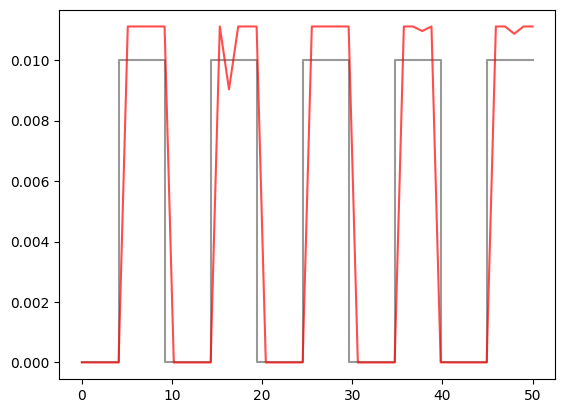

tensor([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1111e-02,
        1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1111e-02, 9.0325e-03, 1.1111e-02,
        1.1111e-02, 1.1111e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02, 1.1111e-02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1111e-02,
        1.1111e-02, 1.0959e-02, 1.1111e-02, 4.9505e-06, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.1111e-02, 1.1111e-02, 1.0870e-02,
        1.1111e-02, 1.1111e-02])

In [3]:
grad_input = torch.tensor([[0.]*5 + [0.01]*5] * 5).flatten()
CDr(grad_input, weight_regulariser=1e-5, dropout_regulariser=1e9, eps=1e-9, tmp=1e-1)#, comparison=comp)

## Trying to freeze CDr probability to make CDr match linear interpolation